In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv("cleaned_optData_with_prices_new.csv")

we need descriptive plots

# NEED TO FILTER CALLS AND PUTS

In [3]:
df.columns

Index(['date', 'act_symbol', 'expiration', 'strike', 'call_put', 'bid', 'ask',
       'vol', 'delta', 'gamma', 'theta', 'vega', 'rho', 'date_year',
       'date_month', 'date_day', 'current_stock_price',
       'stock_price_at_expiration', 'moneyness', 'position', 'opt_price',
       'profit', 'stock_delta_60days'],
      dtype='object')

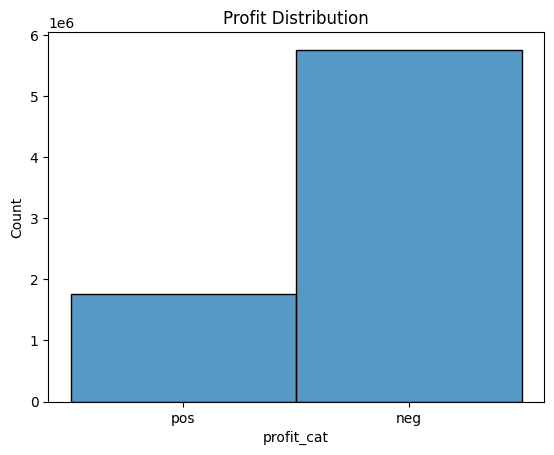

In [4]:
df["profit_cat"] = df["profit"].apply(lambda x: "pos" if x > 0 else "neg")
sns.histplot(x="profit_cat", data=df, bins=2, discrete=True)
plt.title("Profit Distribution")
plt.show()

In [5]:
print(df["profit"].min())
print(df["profit"].max())
print(df["profit"].mean())
print(df["profit"].median())

-4107.354501342774
3110.8545013427733
-9.724592341630336
-3.509999847412109


In [27]:
df_copy = df.dropna(subset=["profit"])
df_tot = df_copy.shape[0]
profit = df_copy[(df_copy["profit"] > -100) & (df_copy["profit"] < 100)]
profit_loss_out = df_copy[df_copy["profit"] <= -100]
profit_gain_out = df_copy[df_copy["profit"] >= 100]
profit_loss = profit_loss_out.shape[0]
profit_gain = profit_gain_out.shape[0]
profit_tot = profit.shape[0]
print(df_tot, profit_tot, profit_loss, profit_gain, profit_tot/df_tot, profit_loss/profit_tot, profit_gain/profit_tot)

5935509 5796580 105718 33211 0.9765935827912989 0.018237995507695916 0.005729412860686818


In [ ]:
df_

,date,act_symbol,expiration,strike,call_put,bid,ask,vol,delta,gamma,...,date_year,date_month,date_day,current_stock_price,stock_price_at_expiration,moneyness,position,opt_price,profit,stock_delta_60days
0,2020-01-04,A,2020-01-17,72.5,Call,11.75,12.90,0.2345,0.9997,0.0003,...,2020,1,4,84.570000,90.120003,17.620003,ITM,12.325,5.295003,NaN
1,2020-01-04,A,2020-01-17,72.5,Put,0.01,0.03,0.2421,-0.0005,0.0004,...,2020,1,4,84.570000,90.120003,-17.620003,OTM,0.020,-17.640003,NaN
2,2020-01-04,A,2020-01-17,75.0,Call,8.05,10.20,0.2345,0.9960,0.0030,...,2020,1,4,84.570000,90.120003,15.120003,ITM,9.125,5.995003,NaN
3,2020-01-04,A,2020-01-17,75.0,Put,0.01,0.10,0.2421,-0.0051,0.0036,...,2020,1,4,84.570000,90.120003,-15.120003,OTM,0.055,-15.175003,NaN
4,2020-01-04,A,2020-01-17,77.5,Call,7.05,7.55,0.2345,0.9738,0.0157,...,2020,1,4,84.570000,90.120003,12.620003,ITM,7.300,5.320003,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7519012,2020-08-19,CTSH,2020-09-18,75.0,Put,8.00,8.60,0.2168,-0.9700,0.0169,...,2020,8,19,66.889999,68.860001,6.139999,ITM,8.300,-2.160001,23.504431
7519013,2020-08-19,CTSH,2020-09-18,77.5,Call,0.00,0.10,0.2168,0.0084,0.0055,...,2020,8,19,66.889999,68.860001,-8.639999,OTM,0.050,-8.689999,23.504431
7519014,2020-08-19,CTSH,2020-09-18,77.5,Put,10.50,11.00,0.2168,-0.9929,0.0055,...,2020,8,19,66.889999,68.860001,8.639999,ITM,10.750,-2.110001,23.504431
7519015,2020-08-19,CTSH,2020-09-18,80.0,Call,0.00,0.10,0.2168,0.0019,0.0014,...,2020,8,19,66.889999,68.860001,-11.139999,OTM,0.050,-11.189999,23.504431


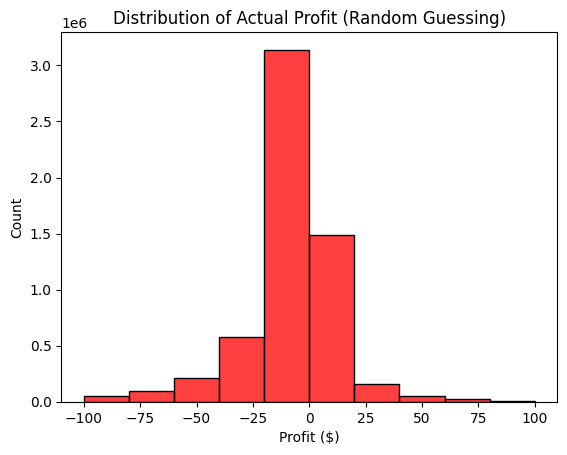

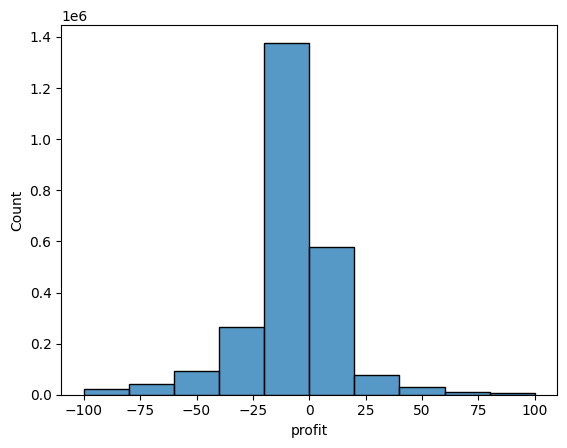

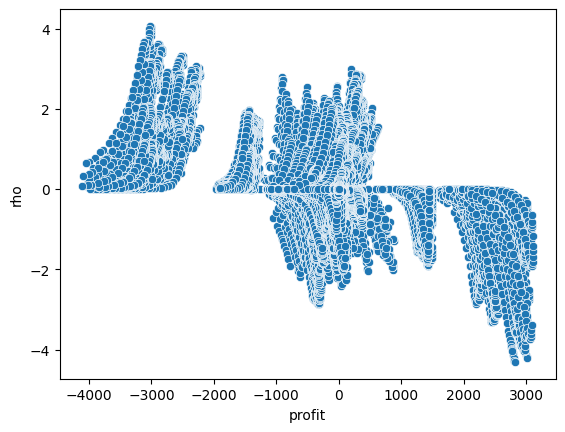

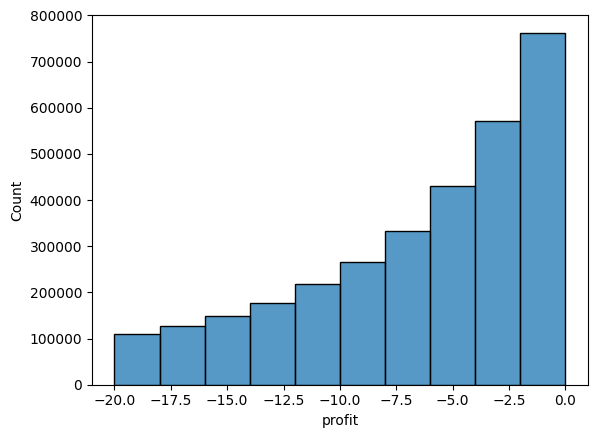

In [32]:
profit_col = profit["profit"]
sns.histplot(profit_col, bins=10, color="red")
plt.ticklabel_format(style=None, axis='y')
plt.title("Distribution of Actual Profit (Random Guessing)")
plt.xlabel("Profit ($)")
#plt.ylabel("Frequency")
plt.show()

profit_copy = df[(df["profit"] > -100) & (df["profit"] < 100) & (df["rho"] < 0)]["profit"]
sns.histplot(profit_copy, bins=10)
plt.show()

sns.scatterplot(x="profit", y="rho", data=df)
plt.show()


neg_profit = df[(df["profit"] < 0) & (df["profit"] > -20)]["profit"]
sns.histplot(neg_profit, bins=10)
plt.show()

In [7]:
df

,date,act_symbol,expiration,strike,call_put,bid,ask,vol,delta,gamma,...,date_month,date_day,current_stock_price,stock_price_at_expiration,moneyness,position,opt_price,profit,stock_delta_60days,profit_cat
0,2020-01-04,A,2020-01-17,72.5,Call,11.75,12.90,0.2345,0.9997,0.0003,...,1,4,84.570000,90.120003,17.620003,ITM,12.325,5.295003,NaN,pos
1,2020-01-04,A,2020-01-17,72.5,Put,0.01,0.03,0.2421,-0.0005,0.0004,...,1,4,84.570000,90.120003,-17.620003,OTM,0.020,-17.640003,NaN,neg
2,2020-01-04,A,2020-01-17,75.0,Call,8.05,10.20,0.2345,0.9960,0.0030,...,1,4,84.570000,90.120003,15.120003,ITM,9.125,5.995003,NaN,pos
3,2020-01-04,A,2020-01-17,75.0,Put,0.01,0.10,0.2421,-0.0051,0.0036,...,1,4,84.570000,90.120003,-15.120003,OTM,0.055,-15.175003,NaN,neg
4,2020-01-04,A,2020-01-17,77.5,Call,7.05,7.55,0.2345,0.9738,0.0157,...,1,4,84.570000,90.120003,12.620003,ITM,7.300,5.320003,NaN,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7519012,2020-08-19,CTSH,2020-09-18,75.0,Put,8.00,8.60,0.2168,-0.9700,0.0169,...,8,19,66.889999,68.860001,6.139999,ITM,8.300,-2.160001,23.504431,neg
7519013,2020-08-19,CTSH,2020-09-18,77.5,Call,0.00,0.10,0.2168,0.0084,0.0055,...,8,19,66.889999,68.860001,-8.639999,OTM,0.050,-8.689999,23.504431,neg
7519014,2020-08-19,CTSH,2020-09-18,77.5,Put,10.50,11.00,0.2168,-0.9929,0.0055,...,8,19,66.889999,68.860001,8.639999,ITM,10.750,-2.110001,23.504431,neg
7519015,2020-08-19,CTSH,2020-09-18,80.0,Call,0.00,0.10,0.2168,0.0019,0.0014,...,8,19,66.889999,68.860001,-11.139999,OTM,0.050,-11.189999,23.504431,neg


In [8]:
# trying to get heatmap stuff for the greeks, haven't finished this yet
df['call'] = df['call_put'].apply(lambda x: 1 if x == 'Call' else 0)
df['put'] = df['call_put'].apply(lambda x: 1 if x == 'Put' else 0)

In [9]:
cp_greeks = df[['call_put', 'delta', 'gamma', 'vega', 'theta', 'rho']].set_index('call_put')
cp_greeks

,delta,gamma,vega,theta,rho
call_put,,,,,
Call,0.9997,0.0003,0.0002,-0.0037,0.0278
Put,-0.0005,0.0004,0.0003,-0.0003,0.0000
Call,0.9960,0.0030,0.0020,-0.0052,0.0286
Put,-0.0051,0.0036,0.0024,-0.0021,-0.0002
Call,0.9738,0.0157,0.0101,-0.0121,0.0288
...,...,...,...,...,...
Put,-0.9700,0.0169,0.0142,-0.0045,-0.0242
Call,0.0084,0.0055,0.0044,-0.0016,0.0005
Put,-0.9929,0.0055,0.0044,-0.0012,-0.0067


In [10]:
pos_profit = df[df['profit'] > 0]
neg_profit = df[df['profit'] < 0]
print(pos_profit.shape[0] / df.shape[0] * 100)
print(df.shape, pos_profit.shape)

# average profit * profitable % (.2337)
# average loss * (1 - profitable %)

23.37298878297522
(7519017, 26) (1757419, 26)


In [11]:
avg_profit = pos_profit["profit"].mean()
avg_loss = neg_profit["profit"].median()
print(avg_profit, avg_loss)
print(avg_profit *.2337)
print(avg_loss * (1 - .2337))

print(avg_profit * .5)
print(avg_loss * .5)

print((avg_profit * .2337 + avg_loss * (1-.2337))/2)
print((avg_profit * .5 + avg_loss * .5) / 2)

17.98624458694925 -7.940000915527344
4.2033853599700395
-6.084422701568603
8.993122293474626
-3.970000457763672
-0.9405186707992819
2.5115609178554767


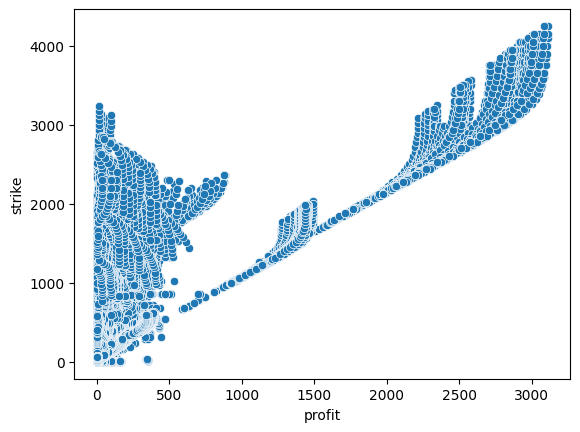

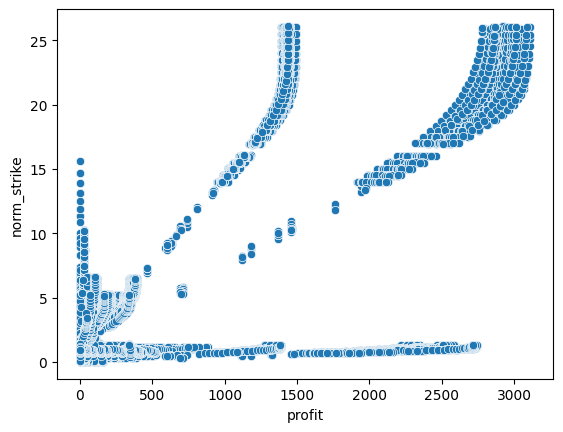

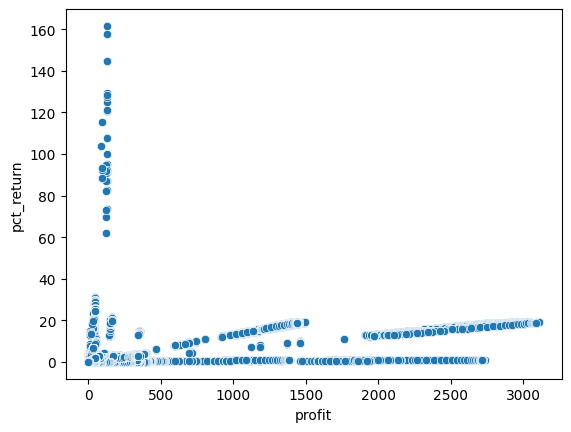

<Axes: xlabel='pct_return', ylabel='norm_strike'>

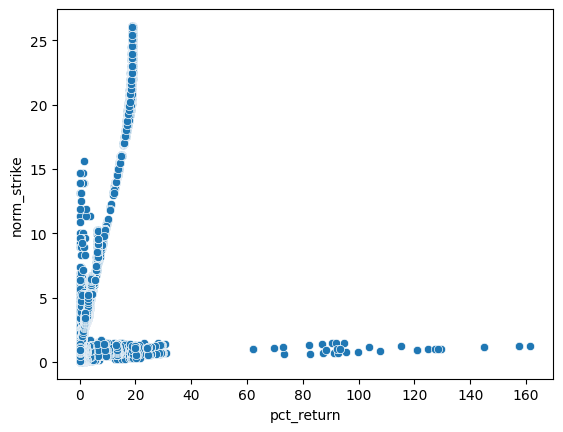

In [12]:
# graphs of strike price
pos_profit["norm_strike"] = pos_profit["strike"]/pos_profit["current_stock_price"]
pos_profit["pct_return"] = pos_profit["profit"]/pos_profit["current_stock_price"]
sns.scatterplot(x="profit", y="strike", data=pos_profit)
plt.show()
sns.scatterplot(x="profit", y="norm_strike", data=pos_profit)
plt.show()
sns.scatterplot(x="profit", y="pct_return", data=pos_profit)
plt.show()
sns.scatterplot(x="pct_return", y="norm_strike", data=pos_profit)

# Using Sentiment

In [ ]:
sent = pd.read_csv("cleaned_optData_with_prices_sentiment.csv")
print(sent.shape)
sent_copy = sent[(sent["avg_pos_score"].isna() == False) & (sent["avg_neg_score"].isna() == False)]
print(sent_copy.shape)

(112910, 26)
(61673, 26)
123346


In [18]:
sent

,date,act_symbol,expiration,strike,call_put,bid,ask,vol,delta,gamma,...,current_stock_price,stock_price_at_expiration,moneyness,position,opt_price,profit,stock_delta_60days,priceDelta,avg_pos_score,avg_neg_score
0,2020-01-04,A,2020-01-17,72.5,Call,11.75,12.90,0.2345,0.9997,0.0003,...,84.57,90.120003,17.620003,ITM,12.325,5.295003,NaN,-0.979310,NaN,NaN
1,2020-01-04,A,2020-01-17,72.5,Put,0.01,0.03,0.2421,-0.0005,0.0004,...,84.57,90.120003,-17.620003,OTM,0.020,-17.640003,NaN,-603.499985,NaN,NaN
2,2020-01-04,A,2020-01-17,75.0,Call,8.05,10.20,0.2345,0.9960,0.0030,...,84.57,90.120003,15.120003,ITM,9.125,5.995003,NaN,-1.048767,NaN,NaN
3,2020-01-04,A,2020-01-17,75.0,Put,0.01,0.10,0.2421,-0.0051,0.0036,...,84.57,90.120003,-15.120003,OTM,0.055,-15.175003,NaN,-173.999994,NaN,NaN
4,2020-01-04,A,2020-01-17,77.5,Call,7.05,7.55,0.2345,0.9738,0.0157,...,84.57,90.120003,12.620003,ITM,7.300,5.320003,NaN,-0.968493,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112905,2020-01-08,LNC,2020-01-17,57.5,Call,1.57,1.70,0.2627,0.6911,0.1463,...,59.02,60.040001,2.540001,ITM,1.635,0.905001,-2.252402,-0.929664,NaN,NaN
112906,2020-01-08,LNC,2020-01-17,57.5,Put,0.45,0.54,0.2639,-0.3100,0.1460,...,59.02,60.040001,-2.540001,OTM,0.495,-3.035001,-2.252402,-3.070708,NaN,NaN
112907,2020-01-08,LNC,2020-01-17,60.0,Call,0.32,0.38,0.2324,0.2714,0.1556,...,59.02,60.040001,0.040001,ITM,0.350,-0.309999,-2.252402,2.799999,NaN,NaN
112908,2020-01-08,LNC,2020-01-17,60.0,Put,1.55,2.09,0.2683,-0.7008,0.1422,...,59.02,60.040001,-0.040001,OTM,1.820,-1.860001,-2.252402,0.538461,NaN,NaN


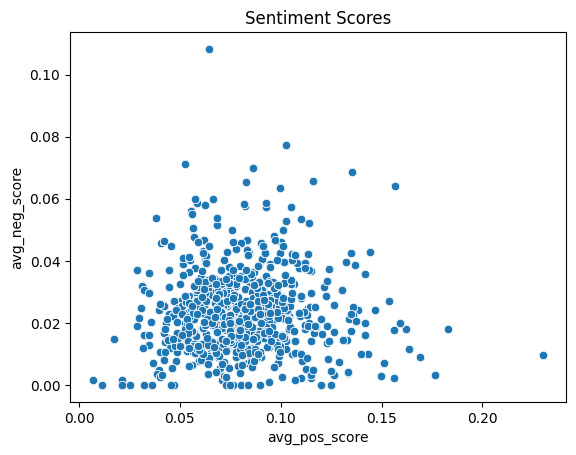

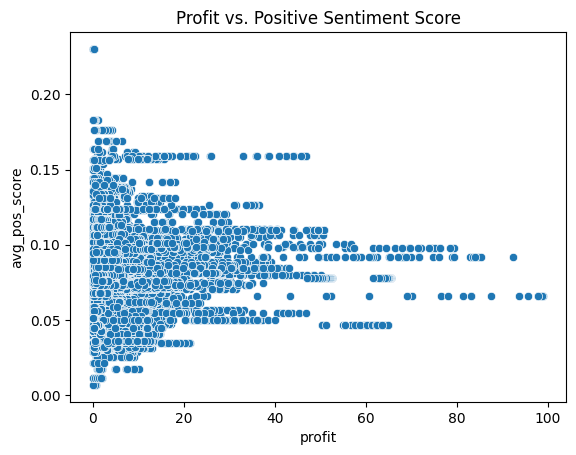

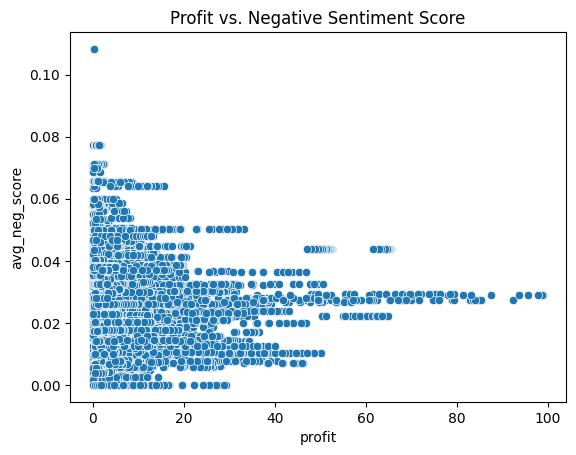

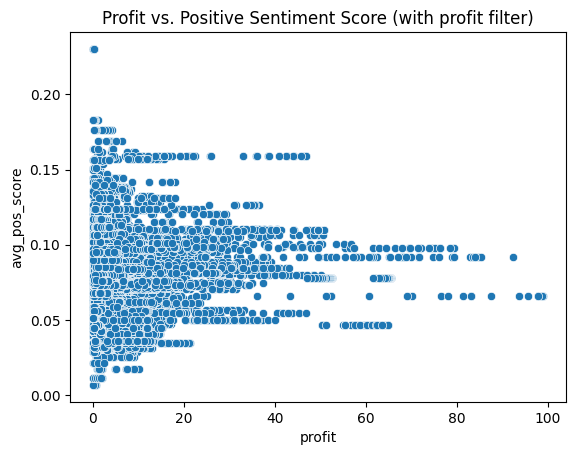

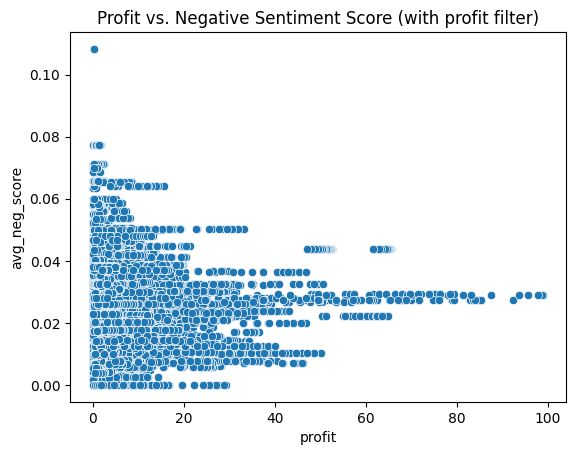

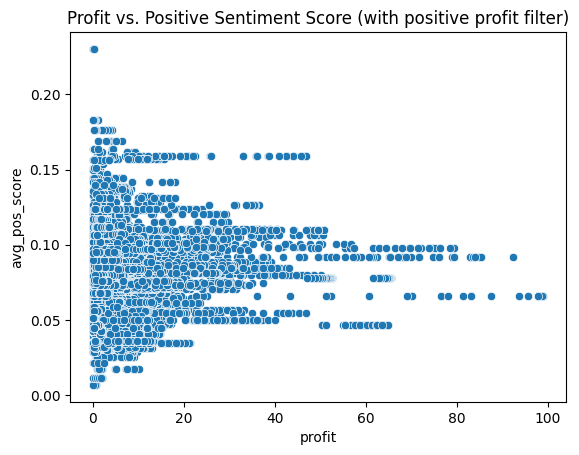

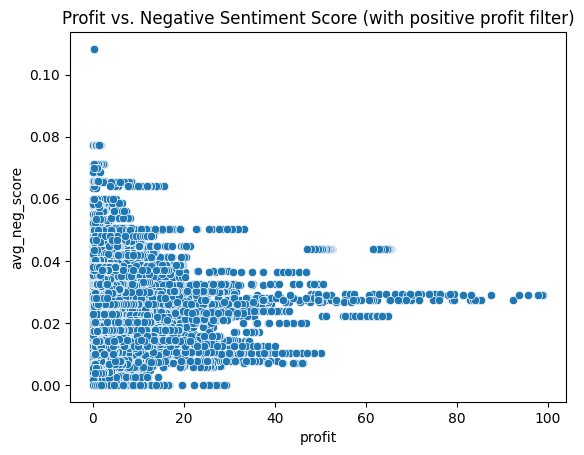

Text(0.5, 1.0, 'Positive Sentiment Score Distribution')

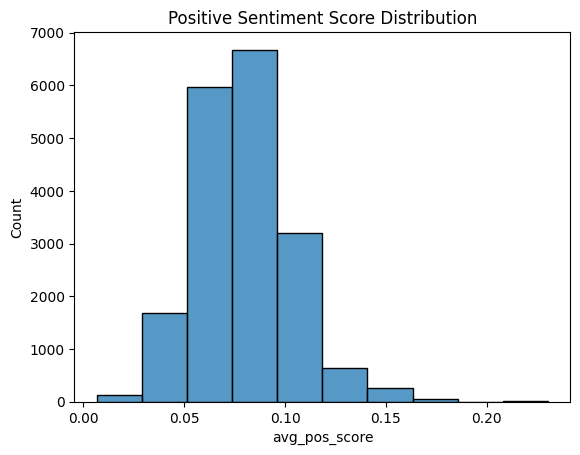

In [28]:
sns.scatterplot(x="avg_pos_score", y="avg_neg_score", data=sent_copy)
plt.title("Sentiment Scores")
plt.show()

sns.scatterplot(x="profit", y="avg_pos_score", data=sent_copy)
plt.title("Profit vs. Positive Sentiment Score")
plt.show()

sns.scatterplot(x="profit", y="avg_neg_score", data=sent_copy)
plt.title("Profit vs. Negative Sentiment Score")
plt.show()

sent_copy = sent_copy[(sent_copy["profit"] > -100) & (sent_copy["profit"] < 100)]
sns.scatterplot(x="profit", y="avg_pos_score", data=sent_copy)
plt.title("Profit vs. Positive Sentiment Score (with profit filter)")
plt.show()

sns.scatterplot(x="profit", y="avg_neg_score", data=sent_copy)
plt.title("Profit vs. Negative Sentiment Score (with profit filter)")
plt.show()

sent_copy = sent_copy[(sent_copy["profit"] > 0) & (sent_copy["profit"] < 100)]
sns.scatterplot(x="profit", y="avg_pos_score", data=sent_copy)
plt.title("Profit vs. Positive Sentiment Score (with positive profit filter)")
plt.show()

sns.scatterplot(x="profit", y="avg_neg_score", data=sent_copy)
plt.title("Profit vs. Negative Sentiment Score (with positive profit filter)")
plt.show()

sns.histplot(x="avg_pos_score", data=sent_copy, bins=10)
plt.title("Positive Sentiment Score Distribution")

In [29]:
sent_copy

,date,act_symbol,expiration,strike,call_put,bid,ask,vol,delta,gamma,...,current_stock_price,stock_price_at_expiration,moneyness,position,opt_price,profit,stock_delta_60days,priceDelta,avg_pos_score,avg_neg_score
40,2020-01-04,AAL,2020-01-17,23.5,Call,4.10,4.30,0.4664,0.9667,0.0294,...,27.650000,28.400000,4.900000,ITM,4.200,0.700000,NaN,-0.988095,0.073535,0.042773
42,2020-01-04,AAL,2020-01-17,25.0,Call,2.74,2.85,0.4353,0.8912,0.0792,...,27.650000,28.400000,3.400000,ITM,2.795,0.605000,NaN,-0.948122,0.073535,0.042773
44,2020-01-04,AAL,2020-01-17,25.5,Call,2.28,2.40,0.4108,0.8543,0.1028,...,27.650000,28.400000,2.900000,ITM,2.340,0.560000,NaN,-0.918803,0.073535,0.042773
46,2020-01-04,AAL,2020-01-17,26.5,Call,1.50,1.53,0.3781,0.7324,0.1608,...,27.650000,28.400000,1.900000,ITM,1.515,0.385000,NaN,-0.759076,0.073535,0.042773
48,2020-01-04,AAL,2020-01-17,27.0,Call,1.15,1.18,0.3686,0.6462,0.1864,...,27.650000,28.400000,1.400000,ITM,1.165,0.235000,NaN,-0.557940,0.073535,0.042773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112483,2020-01-08,LHX,2020-02-21,180.0,Call,31.20,32.90,0.2438,0.9768,0.0031,...,211.289993,222.800003,42.800003,ITM,32.050,10.750003,7.790016,-0.976287,0.083600,0.041943
112485,2020-01-08,LHX,2020-02-21,190.0,Call,20.40,24.40,0.2438,0.9097,0.0092,...,211.289993,222.800003,32.800003,ITM,22.400,10.400003,7.790016,-0.950446,0.083600,0.041943
112487,2020-01-08,LHX,2020-02-21,195.0,Call,17.50,18.80,0.2438,0.8479,0.0134,...,211.289993,222.800003,27.800003,ITM,18.150,9.650003,7.790016,-0.897520,0.083600,0.041943
112489,2020-01-08,LHX,2020-02-21,200.0,Call,13.50,14.30,0.2283,0.7785,0.0180,...,211.289993,222.800003,22.800003,ITM,13.900,8.900003,7.790016,-0.812230,0.083600,0.041943


In [31]:
grouped = sent_copy.groupby("act_symbol")[["avg_pos_score", "avg_neg_score", "profit"]].mean().reset_index()
grouped

,act_symbol,avg_pos_score,avg_neg_score,profit
0,AAL,0.073535,0.042773,0.427727
1,AAN,0.064190,0.023286,6.909772
2,AAP,0.072821,0.030357,7.392235
3,AAT,0.092714,0.058571,0.561876
4,ABBV,0.099633,0.023825,3.857728
...,...,...,...,...
729,YELP,0.060314,0.023371,1.179839
730,ZBH,0.077857,0.016429,3.826390
731,ZBRA,0.082238,0.016738,7.671763
732,ZION,0.043347,0.019857,3.006562


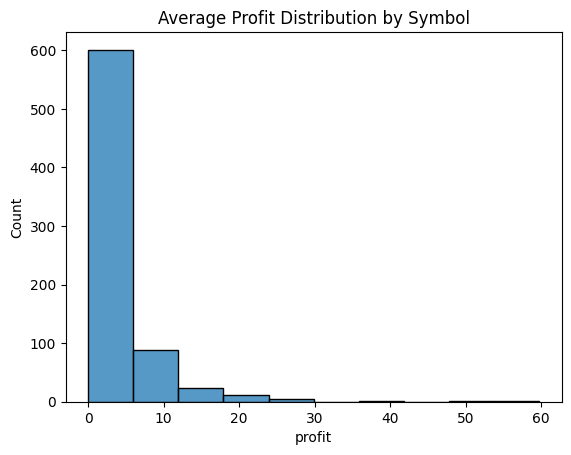

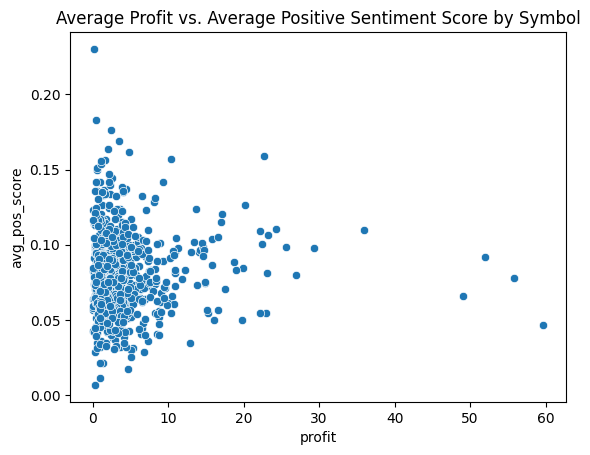

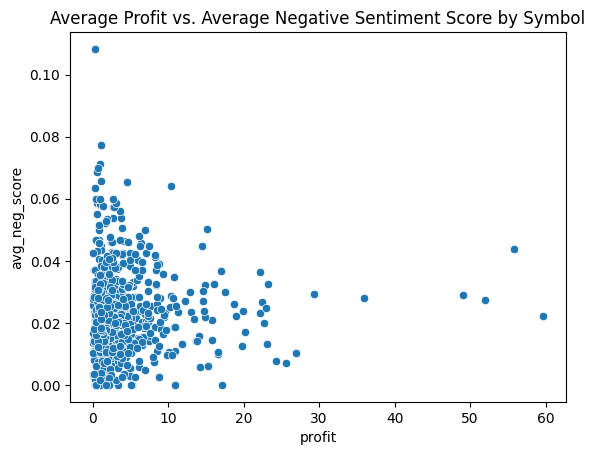

In [34]:
sns.histplot(x="profit", data=grouped, bins=10)
plt.title("Average Profit Distribution by Symbol")
plt.show()

sns.scatterplot(x="profit", y="avg_pos_score", data=grouped)
plt.title("Average Profit vs. Average Positive Sentiment Score by Symbol")
plt.show()

sns.scatterplot(x="profit", y="avg_neg_score", data=grouped)
plt.title("Average Profit vs. Average Negative Sentiment Score by Symbol")
plt.show()

histogram of deltas, then look at delta with calls vs. puts
try heat maps of something, find other interesting graphs

also look at the different outliers and what can be seen from them

run third pipeline on i think the dataset before sentiment